In [32]:
from keras.datasets import mnist
import pandas as pd

In [33]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [34]:
print("X_train shape:", X_train.shape[0])
print("X_test shape:", X_test.shape[0])

X_train shape: 60000
X_test shape: 10000


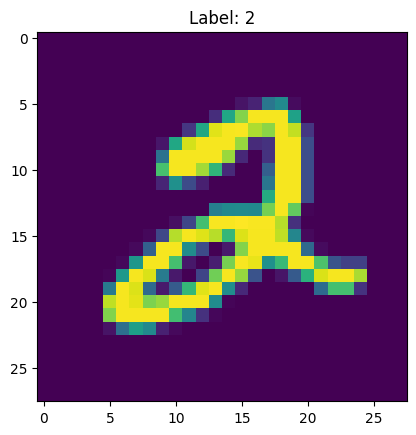

In [35]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])
plt.title("Label: {}".format(y_train[5]))
plt.show()

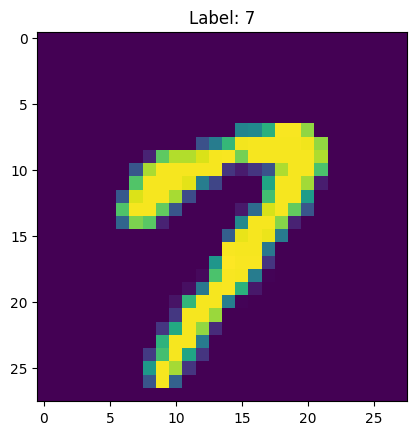

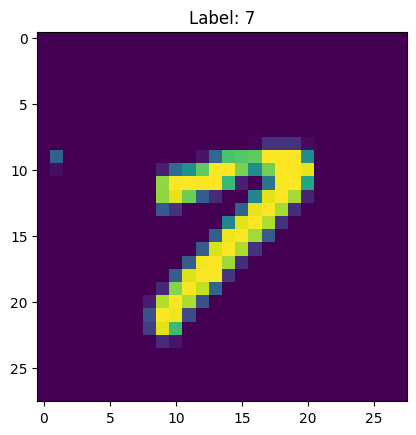

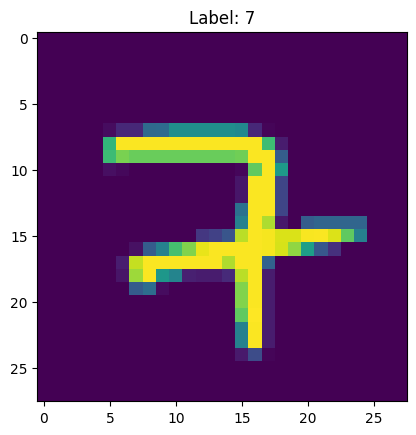

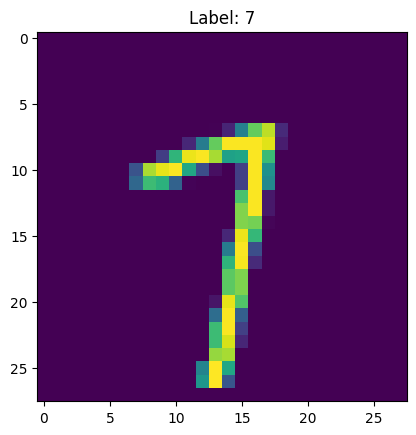

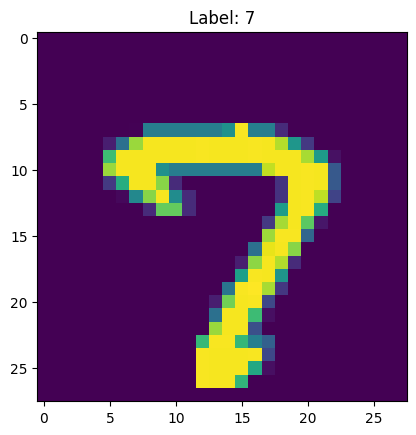

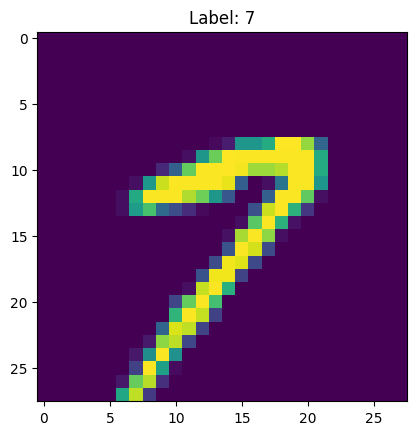

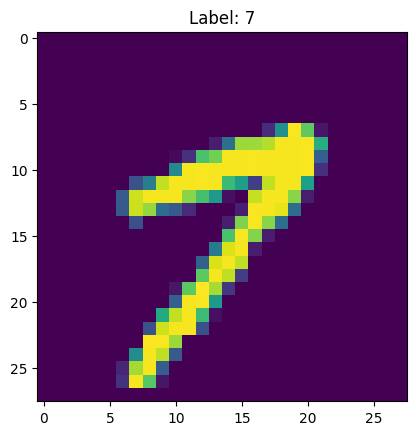

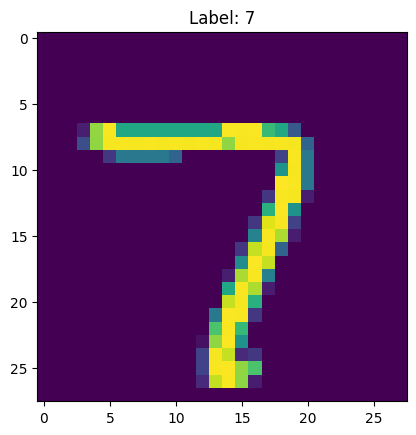

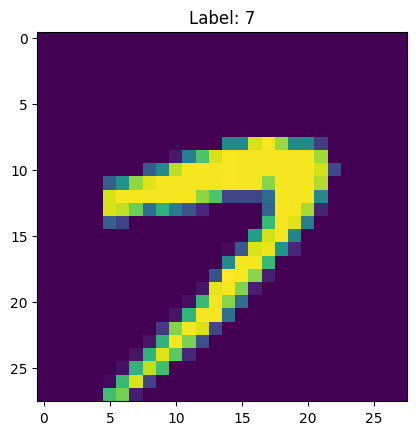

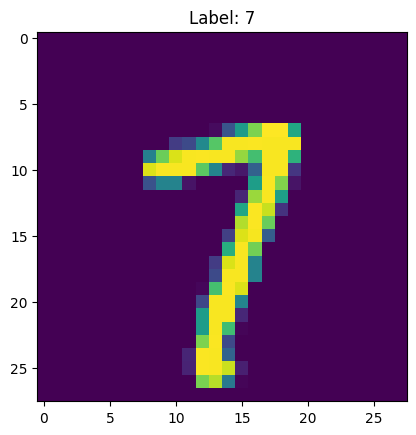

In [36]:
for i in range(100):
    if y_train[i] == 7:
        plt.imshow(X_train[i])
        plt.title("Label: {}".format(y_train[i]))
        plt.show()

In [37]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [38]:
import tensorflow as tf

# neural_net = tf.keras.sequential()
# neural_net.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
# neural_net.add(tf.keras.layers.Dense(16, activation='relu'))
# neural_net.add(tf.keras.layers.Dense(16, activation='relu'))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(16, activation='relu'),  # You can test with 64, 256, etc.
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 digits
])


f:\ml projects\neural netwoks\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7666 - loss: 0.7551
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9333 - loss: 0.2293
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9445 - loss: 0.1944
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9510 - loss: 0.1704
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9541 - loss: 0.1587


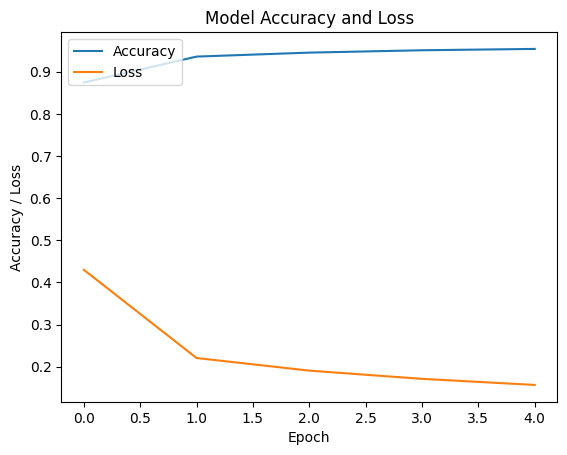

In [41]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy / Loss')   
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')
plt.show() 

Random test image index: 4968


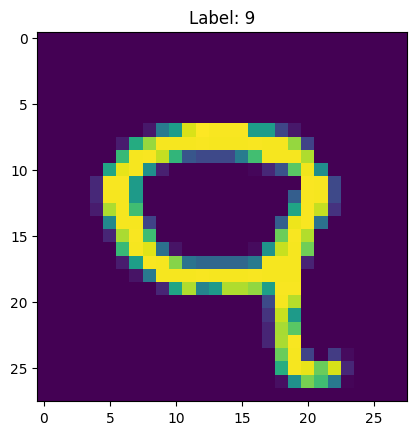

In [42]:
import random as rd
randomint = rd.randint(0, len(X_test) - 1)
print("Random test image index:", randomint)
plt.imshow(X_test[randomint])
plt.title("Label: {}".format(y_test[randomint]))
plt.show()

In [43]:
input = X_test[randomint].reshape(1, 28, 28)
predicted = model.predict(input)
print("Predicted label:", predicted.argmax())
print("Actual label:", y_test[randomint])
print("Prediction probabilities:", predicted[0])
import numpy as np
np.argmax(predicted)  # This will give the index of the highest probability, which corresponds to the predicted label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted label: 9
Actual label: 9
Prediction probabilities: [1.47438713e-03 5.74724157e-10 2.45020565e-05 6.61185368e-07
 1.47592391e-06 1.21365665e-04 2.29792683e-08 2.48466094e-04
 1.63781770e-05 9.98112679e-01]


np.int64(9)